## Chat PDF

In this notebook we shall build a chatbot that accepts a PDF from the user, and based on the PDF answers questions asked by the user </br>

As part of the business use case, this serves to solve the challenge of fine-tuning for specific documents as well as become generic to any PDF documents, saving cost and resources

In [ ]:
#!pip install langchain
#!pip install huggingface-hub

In [1]:
!pip install chromadb
!pip install sentence-transformers

  Using cached chromadb-0.4.6-py3-none-any.whl (405 kB)
  Using cached pulsar_client-3.2.0-cp310-cp310-win_amd64.whl (3.4 MB)
  Using cached tokenizers-0.13.3-cp310-cp310-win_amd64.whl (3.5 MB)
  Using cached chroma-hnswlib-0.7.2.tar.gz (31 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached overrides-7.4.0-py3-none-any.whl (17 kB)
  Using cached posthog-3.0.2-py2.py3-none-any.whl (37 kB)
  Using cached PyPika-0.48.9-py2.py3-none-any.whl
  Using cached onnxruntime-1.15.1-cp310-cp310-win_amd64.whl (6.7 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
  Using cached monotonic-1.6-py2.py3-none-any.whl (8.2 kB)
  Usin

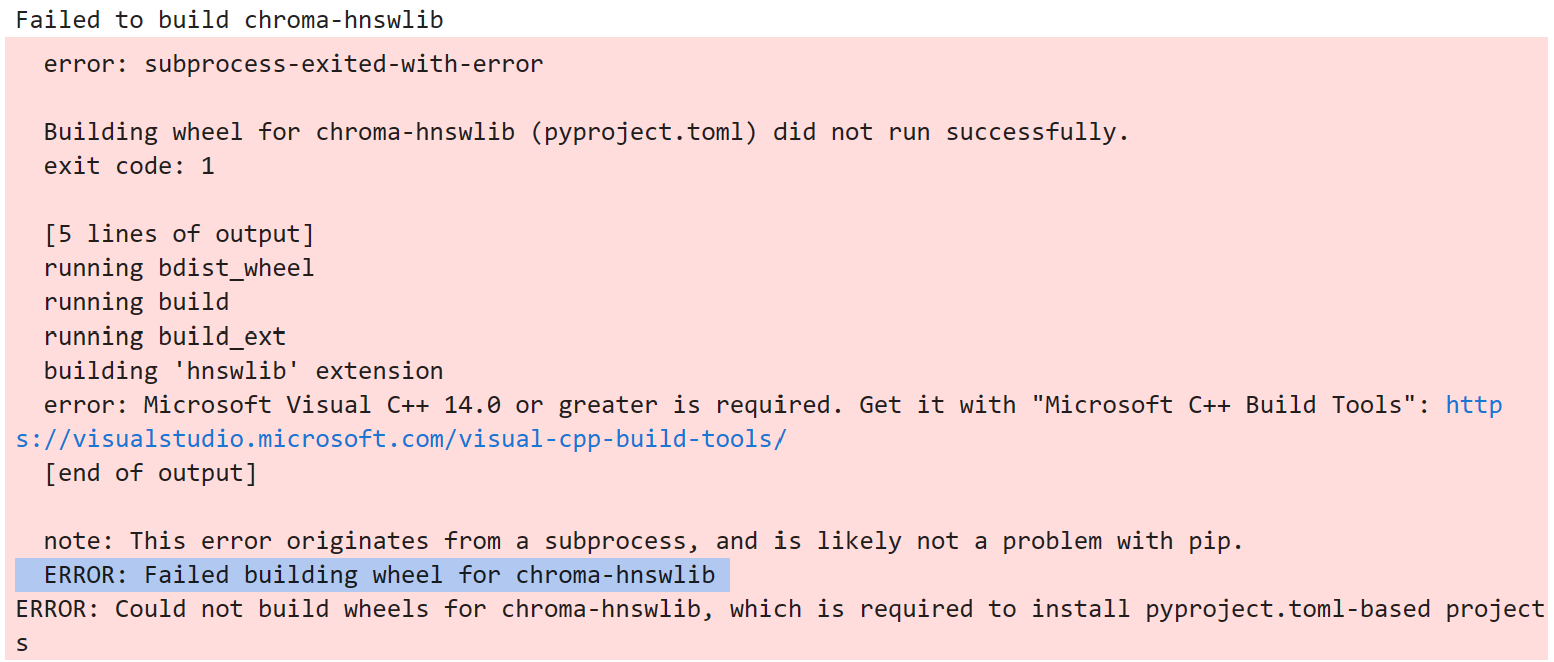

sometimes you might face issues as above when installing chromadb due to missing hnswlib </br>
you need to install visual studio build tools for the purpose: check the solution here
[https://stackoverflow.com/questions/73969269/error-could-not-build-wheels-for-hnswlib-which-is-required-to-install-pyprojec]

In [2]:
!pip install pypdf

Building a PDF Chatbot using Langchain requires the following

* Document loader: to load various data formats and create document objects (here PDF)
* Chunking: chunking the documents using text splitters
* Embedding: embedding the chunks to generate vectors
* vector store: for storing and indexing vector documents (here we shall use Chroma db)
* LLM: language model for question answering and summarizing
* Document Retriever: that retrieves the relevant chunk(s) based on the query from the PDF document 

### Importing libraries

In [3]:
import os
import getpass

from langchain.document_loaders import PyPDFLoader  #document loader: https://python.langchain.com/docs/modules/data_connection/document_loaders
from langchain.text_splitter import RecursiveCharacterTextSplitter  #document transformer: text splitter for chunking
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma #vector store
from langchain import HuggingFaceHub  #model hub
from langchain.chains import RetrievalQA

In [4]:
#loading the API key
os.environ['HUGGING_FACE_HUB_API_KEY'] = getpass.getpass('Hugging face api key:')

Hugging face api key: ········


In [24]:
!pip install gradio

### Reading PDF and creating vector store

In [32]:
path = input("Enter PDF file path: ")#"C:/Users/Sourav/Downloads/Naïve Bayes.pdf"
loader = PyPDFLoader(path)
pages = loader.load()

Enter PDF file path:  pdf_files\Linear_Regression.pdf


In [33]:
#number of pages
len(pages)

6

In [34]:
pages[0]

Document(page_content='Linear Regression  \nWhat is Linear Regression?  \n\uf0b7 Models the relationship between two variables.  \n\uf0b7 Mathematically: 𝑦=𝑚𝑥+𝑐 \n\uf0b7  \nLinear Regression in Machine Learning:  \n\uf0b7 Based on Supervised Learning.  \n\uf0b7 Models target prediction based on independent variables.  \n\uf0b7 Here in the  function , 𝑌=𝑀𝑋+𝐶  Y and X are vectors . \n\uf0b7 M and C known as coefficient of X and intercept respectively.  \n\uf0b7 Best value of M and C gives the  best model  \n\uf0b7 And Cost function helps in estimating  the best value.  \nWhy using Linear Regression ? \n\uf0b7 It is m ore versatile and has wide  applicability.  \no It tells what features are statistically  important  or not.  \no It allows  to understand the relation between different variables.  \no One can get  the confidence inter val for each regression coefficient that it estimates.  \n\uf0b7 It is quite simple and easy to interpret.  \n\uf0b7 It gives better understanding of statist

In [35]:
splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=20)
docs = splitter.split_documents(pages)

In [37]:
len(docs)

13

In [38]:
embeddings = HuggingFaceEmbeddings()
doc_search = Chroma.from_documents(docs, embeddings)

2023-08-22 13:35:21 - Load pretrained SentenceTransformer: sentence-transformers/all-mpnet-base-v2
2023-08-22 13:35:22 - Use pytorch device: cpu
2023-08-22 13:35:22 - Anonymized telemetry enabled. See https://docs.trychroma.com/telemetry for more information.


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.13s/it]


In [39]:
query = "What is Linear Regression"
similar_docs = doc_search.similarity_search(query, k=3)

Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.82it/s]


In [40]:
similar_docs

[Document(page_content='Linear Regression  \nWhat is Linear Regression?  \n\uf0b7 Models the relationship between two variables.  \n\uf0b7 Mathematically: 𝑦=𝑚𝑥+𝑐 \n\uf0b7  \nLinear Regression in Machine Learning:  \n\uf0b7 Based on Supervised Learning.  \n\uf0b7 Models target prediction based on independent variables.  \n\uf0b7 Here in the  function , 𝑌=𝑀𝑋+𝐶  Y and X are vectors . \n\uf0b7 M and C known as coefficient of X and intercept respectively.  \n\uf0b7 Best value of M and C gives the  best model  \n\uf0b7 And Cost function helps in estimating  the best value.', metadata={'page': 0, 'source': 'pdf_files\\Linear_Regression.pdf'}),
 Document(page_content='\uf0b7  Error can be defined  as the difference between the actual value and the predicted value.  \n\uf0b7 In Linear Regression, ideally the  regressi on line  is the line  which  minim izes the e rror across all  \npoints.  \n\uf0b7 Cost function of Linear Regression could be given as:  \n \nWhere “J” is the cost function, whic

### Creating a chain with LLM

In [41]:
repo_id = "tiiuae/falcon-7b"
llm = HuggingFaceHub(huggingfacehub_api_token = os.environ['HUGGING_FACE_HUB_API_KEY'], 
                     repo_id=repo_id, model_kwargs={'temperature': 0.2, 'max_length':1000}) 

#you can modify the parameters temperature and max length to generate different responses

In [42]:
retrieval_chain = RetrievalQA.from_chain_type(
    llm, 
    chain_type='stuff', 
    retriever=doc_search.as_retriever(),
    chain_type_kwargs={
        "memory":ConversationBufferMemory(
            
)

In [43]:
query = "What is the mathematical formulation of Linear Regression"
retrieval_chain.run(query)

Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.16it/s]


'\n\nLinear Regression is a mathematical model that is used to predict the value of a dependent variable'

In [44]:
query2 = "assumptions"
retrieval_chain.run(query2)

Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.49it/s]


'\n\nThe first assumption is that the variables are independent.\nThe second assumption is that the variables'

### Creating interface

In [26]:
import chainlit as cl

In [27]:
@cl.on_chat_start
def main():
    retrieval_chain = RetrievalQA.from_chain_type(llm, chain_type='stuff', retriever=doc_search.as_retriever())
    cl.user_session.set("retrieval_chain", retrieval_chain)
    
@cl.on_message
async def main(message:str):
    retrieval_chain = cl.user_session.get("retrieval_chain")
    res = await retrieval_chain.acall(message, callbacks=
                                      [cl.AsyncLangchainCallbackHandler()])
    
    await cl.Message(content=res["text"]).send()

In [29]:
!chainlit run

Usage: chainlit run [OPTIONS] TARGET
Try 'chainlit run --help' for help.

Error: Missing argument 'TARGET'.


In [31]:
!chainlit run --help

Usage: chainlit run [OPTIONS] TARGET

Options:
  -w, --watch         Reload the app when the module changes
  -h, --headless      Will prevent to auto open the app in the browser
  -d, --debug         Set the log level to debug
  -c, --ci            Flag to run in CI mode
  --no-cache          Useful to disable third parties cache, such as
                      langchain.
  --db [cloud|local]  Useful to control database mode when running CI.
  --host TEXT         Specify a different host to run the server on
  --port TEXT         Specify a different port to run the server on
  --help              Show this message and exit.
